In [2]:
pip install torchvision

  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/69/98/16e583f59f86cd59949f59d52bfa8fc286f86341a229a9d15cbe7a694f0c/torchvision-0.24.1-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for torch==2.9.1 from https://files.pythonhosted.org/packages/b1/1a/64f5769025db846a82567fa5b7d21dba4558a7234ee631712ee4771c436c/torch-2.9.1-cp312-cp312-win_amd64.whl.metadata
   ---------------------------------------- 0.0/4.3 MB ? eta -:--:--
    --------------------------------------- 0.1/4.3 MB 2.6 MB/s eta 0:00:02
   -- ------------------------------------- 0.2/4.3 MB 2.8 MB/s eta 0:00:02
   ---- ----------------------------------- 0.5/4.3 MB 4.2 MB/s eta 0:00:01
   ------- -------------------------------- 0.8/4.3 MB 4.6 MB/s eta 0:00:01
   ---------- ----------------------------- 1.2/4.3 MB 5.3 MB/s eta 0:00:01
   ----------- ---------------------------- 1.2/4.3 MB 4.7 MB/s eta 0:00:01
   ------------ --------------------------- 1.3

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\ABHRA\\OneDrive\\Desktop\\CNN_project\\venv\\Lib\\site-packages\\~orch\\lib\\asmjit.dll'
Check the permissions.



In [6]:
import torch
import torchvision
print(torch.__version__)
print(torchvision.__version__)

2.2.0+cpu
0.17.2+cpu


In [1]:
# Import libraries
from matplotlib import pyplot as plt
from matplotlib import image as plt_img
import os
import torch 
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import random_split,DataLoader,Subset
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.optim import AdamW
from PIL import Image

datasets/train_folder\0\file2163.jpg
datasets/train_folder\0\file2164.jpg
datasets/train_folder\0\file2165.jpg
datasets/train_folder\0\file2166.jpg
datasets/train_folder\0\file2167.jpg
datasets/train_folder\1\file0001.jpg
datasets/train_folder\1\file0002.jpg
datasets/train_folder\1\file0003.jpg
datasets/train_folder\1\file0004.jpg
datasets/train_folder\1\file0005.jpg


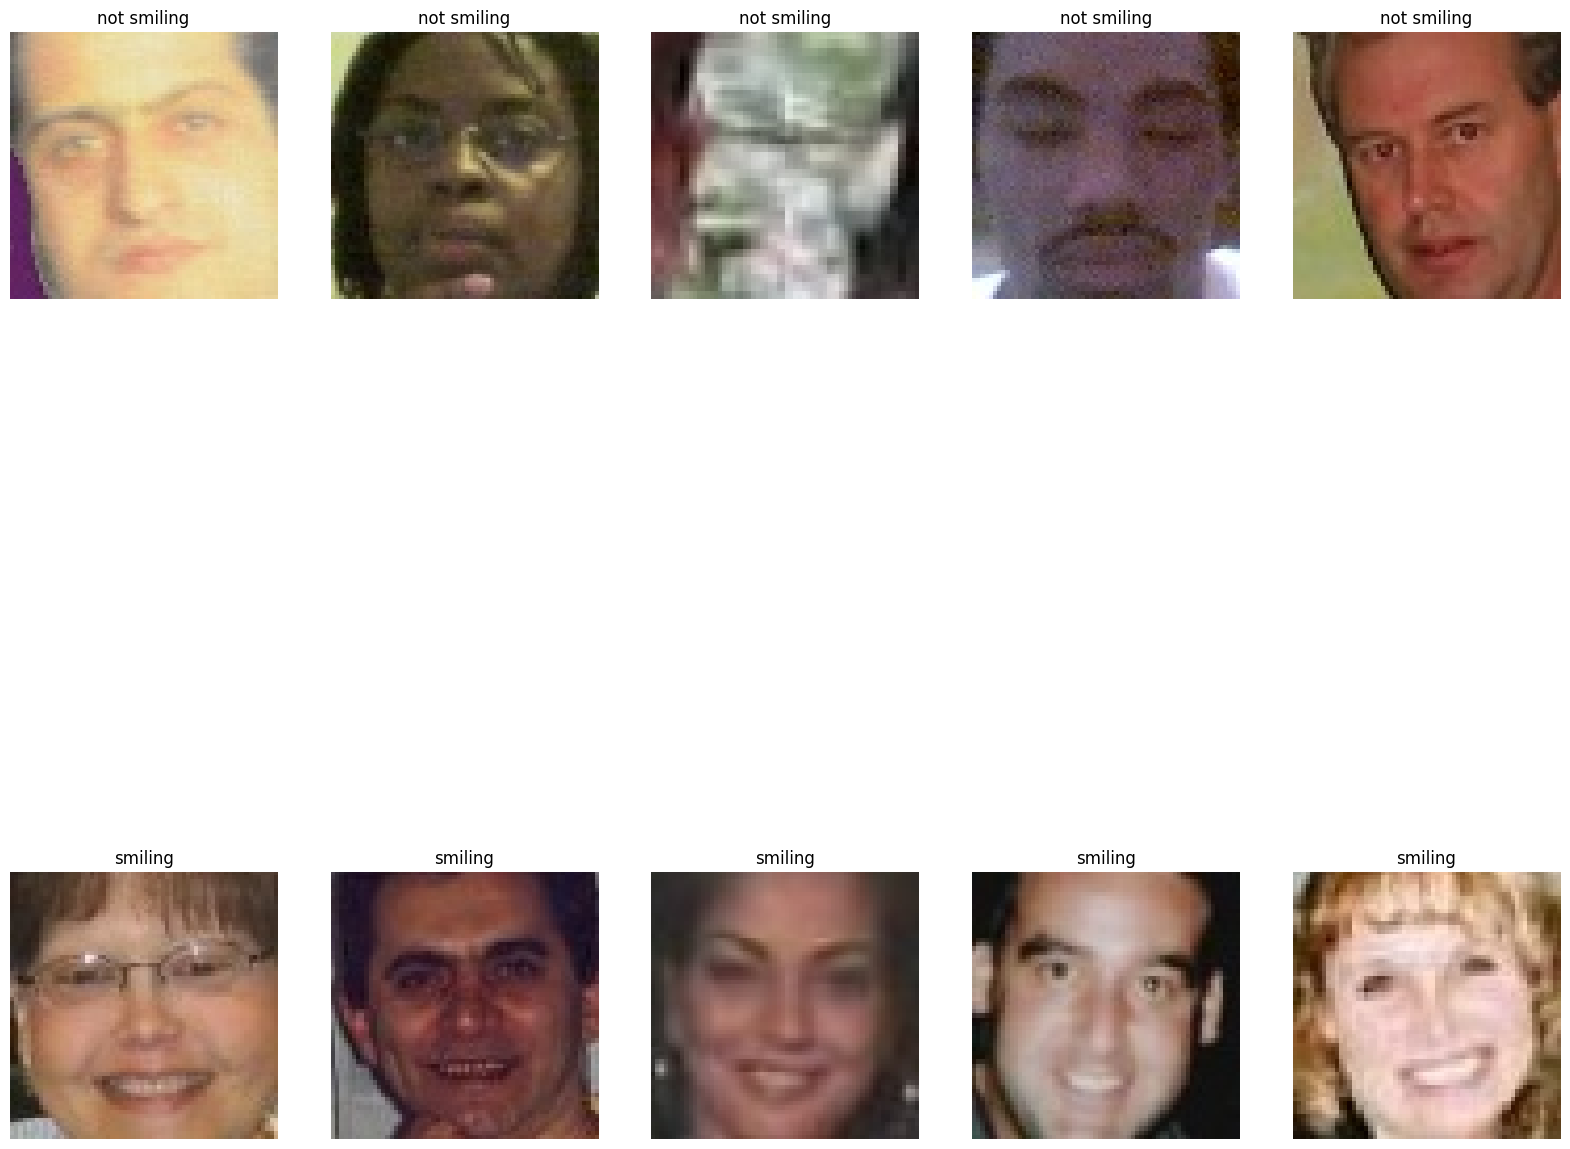

In [2]:
# visualise the dataset
training_images_root = r'datasets/train_folder'
testing_images_root = r'datasets/test_folder'


fig,axs = plt.subplots(2,5,figsize=(20,20))
axs = axs.flatten()
idx=0
for smile in range(2):
    image_root = os.path.join(training_images_root,str(smile))
    threshold = 5
    cnt = 0
    with os.scandir(image_root) as entries:
        for entry in entries:
            print(entry.path)
            img = plt_img.imread(entry.path)
            # plt.figure(figsize=(2, 2))
            axs[idx].imshow(img,cmap='gray')
            emotion = "smiling" if smile==1 else "not smiling"
            axs[idx].set_title(f'{emotion}')
            axs[idx].axis('off')
            idx = idx + 1
            cnt = cnt + 1
            if cnt>=threshold:
                break;
    
# plt.tight_layout()
# plt.show()
    

**Defining the model**

In [3]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 8, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(8,20,5)
        self.fc1 = nn.Linear(20*4*4, 120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,2)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        x = x.view(x.size(0), -1)            # -> n, 400
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10
        return x

**preparing the dataset**

Using ImageFolder because my Directory is structured
data/
├── train/
│   ├── 0/
│   ├── 1/
│   ├── ...


In [4]:
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Convert RGB → Grayscale
    transforms.Resize((28, 28)),                  # Resize to MNIST size
    transforms.ToTensor(),                        # Convert to tensor [0,1]
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))          # Normalize grayscale
])

# Load full training dataset
train_dataset = ImageFolder(root=r'datasets/train_folder', transform=transform)
# I dont want to use wntire MNNIST dataset 
# subset_indices = torch.randperm(len(full_train_dataset))[:12000]
# subset_train_dataset = Subset(full_train_dataset, subset_indices)
test_dataset = ImageFolder(root=r'datasets/test_folder',transform=transform)

# Define split sizes
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset)-train_size

# Split the dataset
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset,batch_size=64)

In [5]:
train_dataset[0]

(tensor([[[-0.8196, -0.7882, -0.7333,  ...,  0.1216, -0.1686, -0.4118],
          [-0.8353, -0.7882, -0.7176,  ...,  0.0980, -0.2627, -0.5529],
          [-0.8353, -0.7647, -0.6863,  ...,  0.0510, -0.3490, -0.6157],
          ...,
          [-0.6941, -0.6706, -0.6471,  ...,  0.4431,  0.3804,  0.2863],
          [-0.6784, -0.6706, -0.6471,  ...,  0.4431,  0.3490,  0.3647],
          [-0.6941, -0.6784, -0.6549,  ...,  0.3882,  0.3412,  0.4745]],
 
         [[-0.8196, -0.7882, -0.7333,  ...,  0.1216, -0.1686, -0.4118],
          [-0.8353, -0.7882, -0.7176,  ...,  0.0980, -0.2627, -0.5529],
          [-0.8353, -0.7647, -0.6863,  ...,  0.0510, -0.3490, -0.6157],
          ...,
          [-0.6941, -0.6706, -0.6471,  ...,  0.4431,  0.3804,  0.2863],
          [-0.6784, -0.6706, -0.6471,  ...,  0.4431,  0.3490,  0.3647],
          [-0.6941, -0.6784, -0.6549,  ...,  0.3882,  0.3412,  0.4745]],
 
         [[-0.8196, -0.7882, -0.7333,  ...,  0.1216, -0.1686, -0.4118],
          [-0.8353, -0.7882,

In [6]:
print(train_loader)

**Training the Model**

In [7]:
# Deefining the Model Parameters
model = ConvNet()
loss_function = nn.CrossEntropyLoss()

In [8]:
# validation score
def validation_score():
    model.eval()
    correct_count = 0
    total = 0
    with torch.no_grad():
        for test_images,labels in val_loader:
            outputs = model(test_images)
            _,pred_labels = torch.max(outputs,dim=1)
            correct_count += (pred_labels==labels).sum().item()
            total += labels.size(0)
    val_score = (correct_count/total)*100.0
    return val_score

In [9]:
epochs = 200
optimizer = AdamW(model.parameters(),lr=0.0001)

In [10]:
train_loss = []
validation_loss = []
for step in range(epochs):
    running_loss = 0.0
    batch = 1
    for inputs,labels in train_loader:
        # forward loop
        # print("Inside Forward Loop")
        outputs = model(inputs)
        # print('input shape',inputs.shape)
        # print('label shape',labels.shape)
        # print('outputs shape',outputs.shape)
        loss = loss_function(outputs,labels)
        # Backpropagation to get gradients
        optimizer.zero_grad()  
        loss.backward()
        # Update the weights 
        optimizer.step()
        running_loss+= loss.item()
        # print(f'batch:{batch}/64 / running_loss:{running_loss}')
    val_loss = validation_score()
    validation_loss.append(val_loss)
    avg_running_loss = running_loss/len(train_loader)
    train_loss.append(avg_running_loss)
    print(f'Epoch:{step}/{epochs}/ Avg. Training Loss: {avg_running_loss}')


Epoch:0/200/ Avg. Training Loss: 0.6858192767415728
Epoch:1/200/ Avg. Training Loss: 0.6793952260698591
Epoch:2/200/ Avg. Training Loss: 0.6700755408832005
Epoch:3/200/ Avg. Training Loss: 0.6529873779841832
Epoch:4/200/ Avg. Training Loss: 0.6231773206165858
Epoch:5/200/ Avg. Training Loss: 0.5825647745813642
Epoch:6/200/ Avg. Training Loss: 0.5344002689634051
Epoch:7/200/ Avg. Training Loss: 0.48763942633356366
Epoch:8/200/ Avg. Training Loss: 0.4572789413588388
Epoch:9/200/ Avg. Training Loss: 0.43108372688293456
Epoch:10/200/ Avg. Training Loss: 0.413379453761237
Epoch:11/200/ Avg. Training Loss: 0.40329905322619847
Epoch:12/200/ Avg. Training Loss: 0.391244923216956
Epoch:13/200/ Avg. Training Loss: 0.38401193874222894
Epoch:14/200/ Avg. Training Loss: 0.3781327873468399
Epoch:15/200/ Avg. Training Loss: 0.3679452981267657
Epoch:16/200/ Avg. Training Loss: 0.3594675579241344
Epoch:17/200/ Avg. Training Loss: 0.35455641576222013
Epoch:18/200/ Avg. Training Loss: 0.352547715817179
E

In [11]:
train_loss

[0.6858192767415728,
 0.6793952260698591,
 0.6700755408832005,
 0.6529873779841832,
 0.6231773206165858,
 0.5825647745813642,
 0.5344002689634051,
 0.48763942633356366,
 0.4572789413588388,
 0.43108372688293456,
 0.413379453761237,
 0.40329905322619847,
 0.391244923216956,
 0.38401193874222894,
 0.3781327873468399,
 0.3679452981267657,
 0.3594675579241344,
 0.35455641576222013,
 0.352547715817179,
 0.3510383214269366,
 0.3404914992196219,
 0.3331002009766442,
 0.3320058341537203,
 0.3296800047159195,
 0.32630208688122886,
 0.3184465263571058,
 0.32218305894306726,
 0.3193325217281069,
 0.308523599590574,
 0.30587026263986317,
 0.3021441050938198,
 0.2982451387814113,
 0.29844256171158384,
 0.2917197729860033,
 0.28847911953926086,
 0.28690987271921975,
 0.28399101027420587,
 0.2806922397443226,
 0.27632195225783757,
 0.27684609762259893,
 0.27045475797993795,
 0.27105469363076345,
 0.2656213011060442,
 0.2668007848518235,
 0.26578722425869533,
 0.2574237887348447,
 0.2561326035431453,


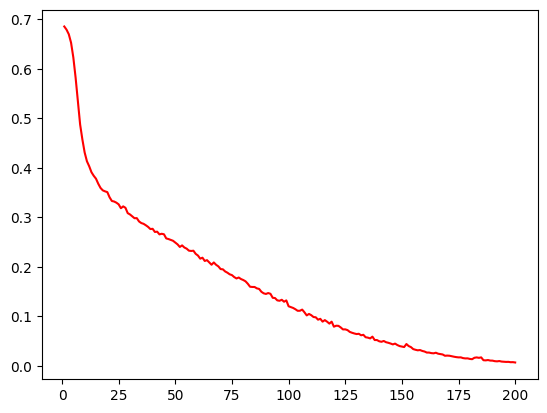

In [12]:
plt.plot(range(1,epochs+1),train_loss,color='red',label='Training Loss')
# plt.plot(validation_loss,range(1,epochs+1),color='yellow',label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Training vs Validation Loss over the time')
# plt.legend()
# plt.show()

#### Testing 

In [13]:
# Testing 
model.eval()
correct_count = 0
total = 0
with torch.no_grad():
    for test_images,labels in test_loader:
        outputs = model(test_images)
        _,pred_labels = torch.max(outputs,dim=1)
        correct_count += (pred_labels==labels).sum().item()
        total += labels.size(0)

acc = (correct_count/total)*100.0
print(f'Accuracy of the model: {acc} %')

Accuracy of the model: 85.08333333333333 %


In [14]:
torch.save(model.state_dict(),'model_states_v0.pt')

datasets/test_folder\0\file3401.jpg
datasets/test_folder\0\file3402.jpg
datasets/test_folder\0\file3403.jpg
datasets/test_folder\0\file3404.jpg
datasets/test_folder\0\file3405.jpg
datasets/test_folder\0\file3406.jpg
datasets/test_folder\0\file3407.jpg
datasets/test_folder\0\file3408.jpg
datasets/test_folder\0\file3409.jpg
datasets/test_folder\0\file3410.jpg
datasets/test_folder\1\file1563.jpg
datasets/test_folder\1\file1564.jpg
datasets/test_folder\1\file1565.jpg
datasets/test_folder\1\file1566.jpg
datasets/test_folder\1\file1567.jpg
datasets/test_folder\1\file1568.jpg
datasets/test_folder\1\file1569.jpg
datasets/test_folder\1\file1570.jpg
datasets/test_folder\1\file1571.jpg
datasets/test_folder\1\file1572.jpg


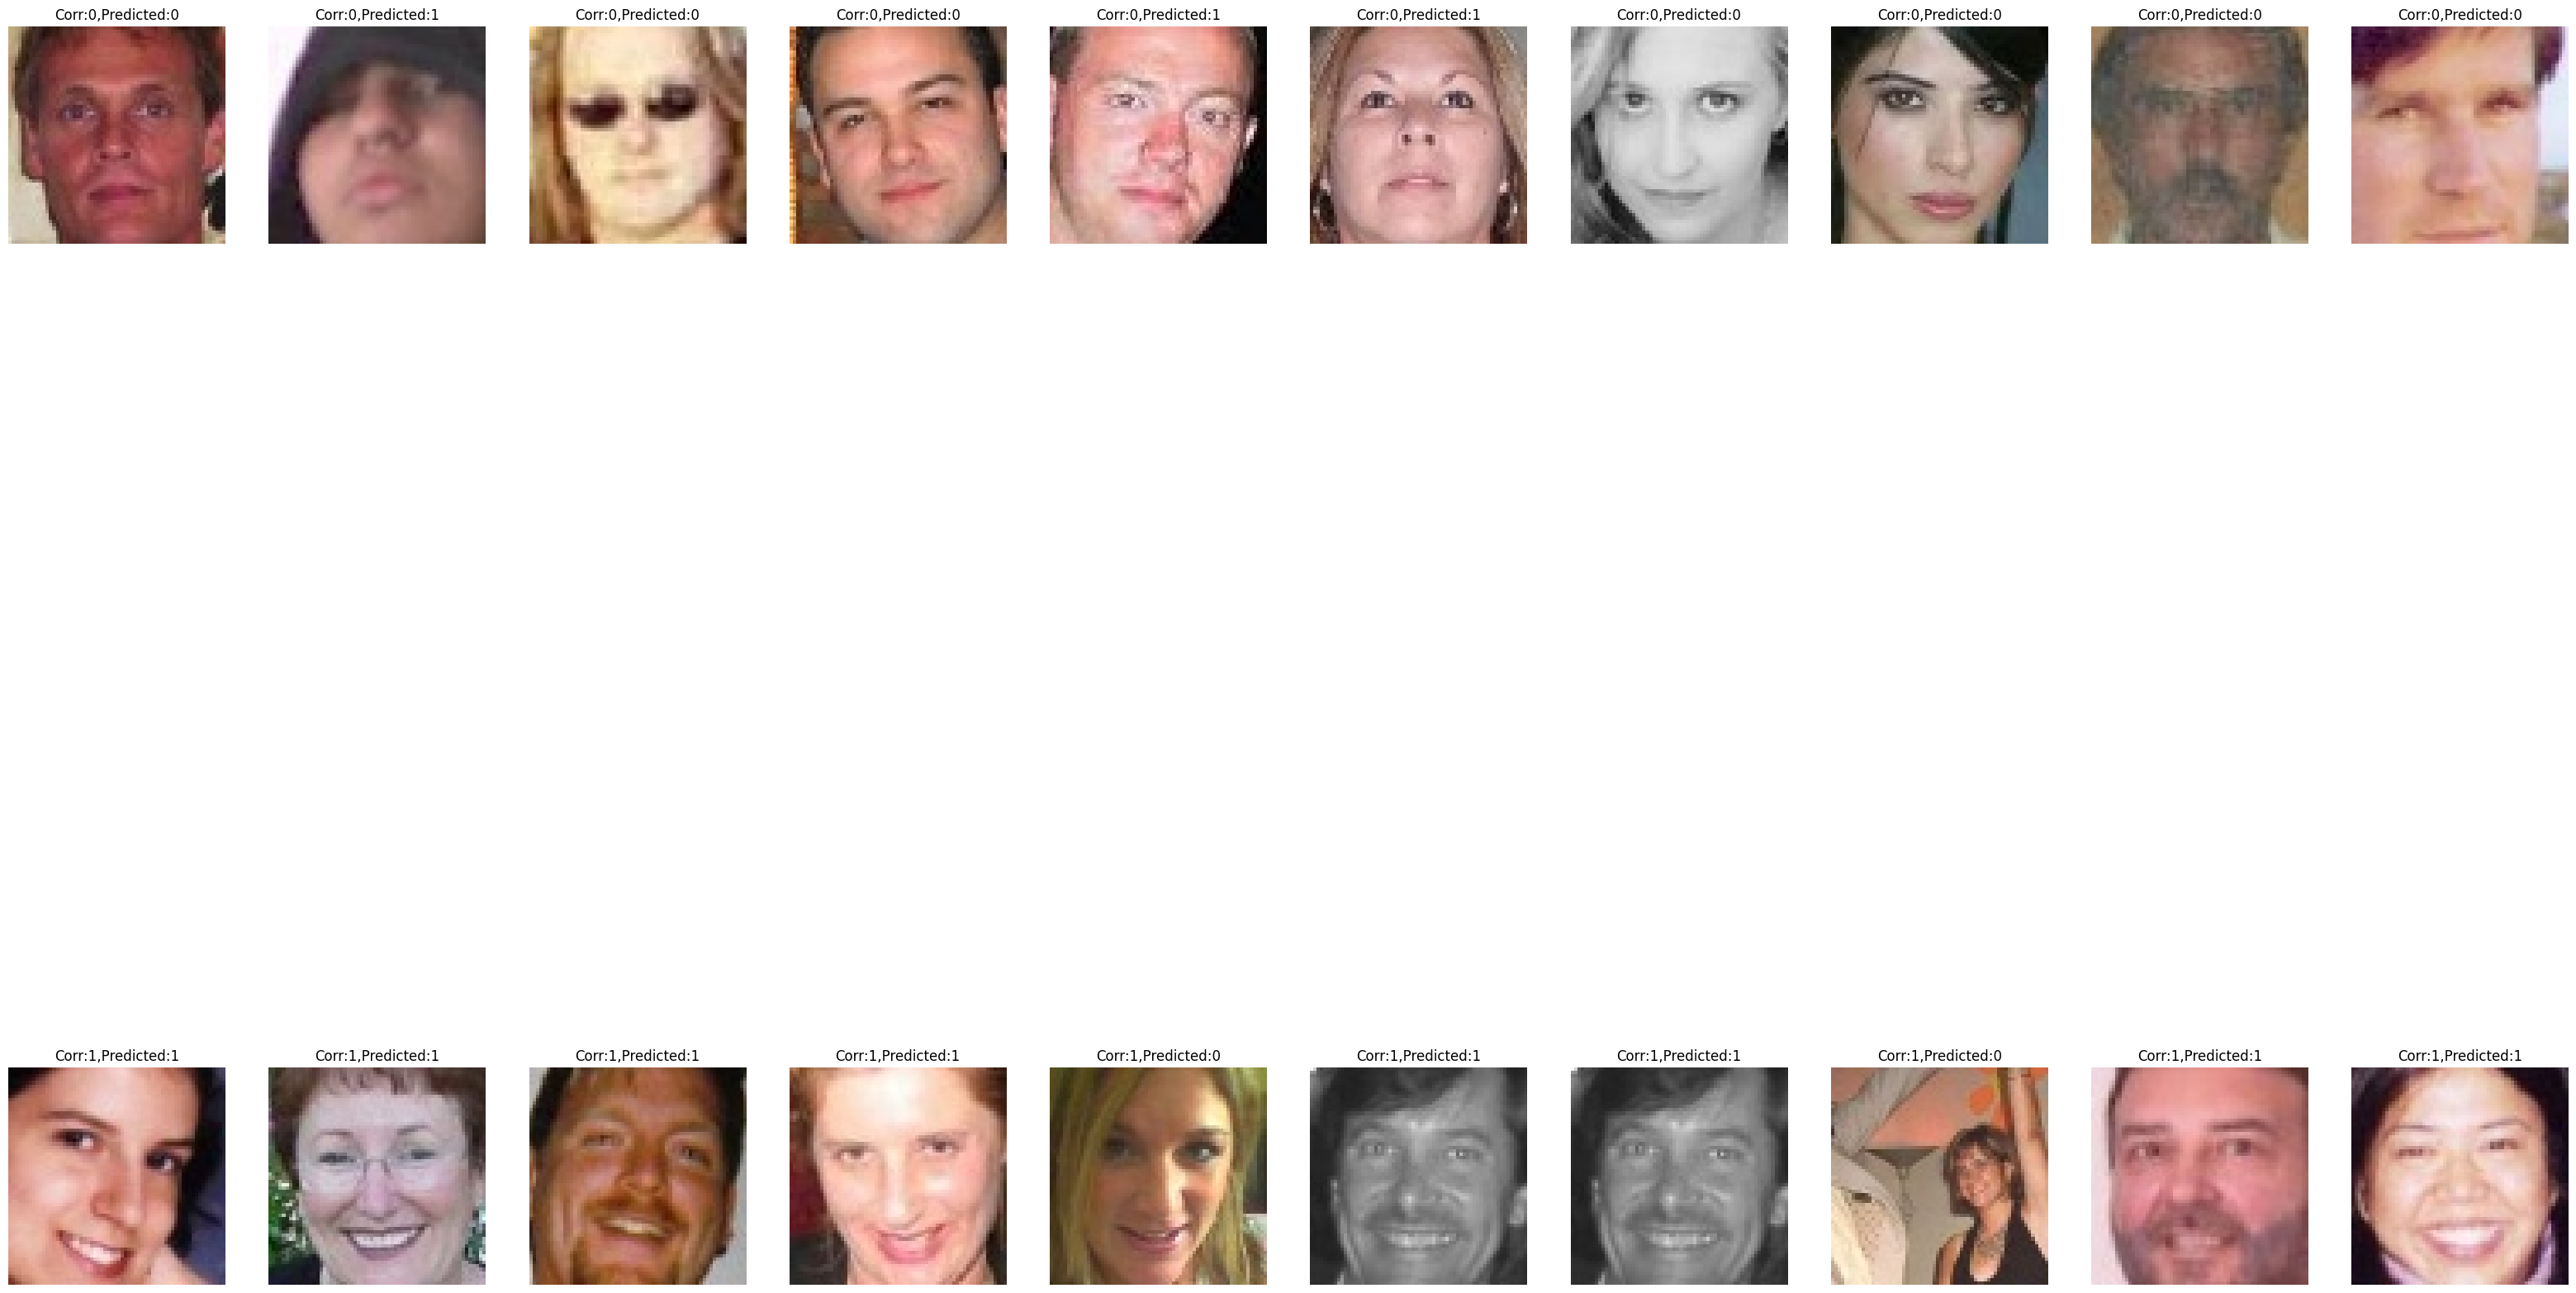

In [ ]:
# visualising the predicted labels 
# visualise the dataset
# testing_images_root = r'dataset/testingSet/trainingSample'
fig,axs = plt.subplots(2,10,figsize=(40,30))
axs = axs.flatten()
idx=0
for emotion in range(0,2):
    image_root = os.path.join(testing_images_root,str(emotion))
    threshold = 10
    cnt = 0
    with os.scandir(image_root) as entries:
        for entry in entries:
            print(entry.path)
            img = plt_img.imread(entry.path)
            # Transform and prepare image
            img = Image.fromarray(img)   
            img_tensor = transform(img).unsqueeze(0) # Add batch dim
            with torch.no_grad():
                output = model(img_tensor)
                predicted_class = output.argmax(dim=1).item()
            axs[idx].imshow(img,cmap='gray')
            axs[idx].set_title(f'Corr:{emotion},Predicted:{predicted_class}')
            axs[idx].axis('off')
            idx = idx + 1
            cnt = cnt + 1
            if cnt>=threshold:
                break;